# Cosine-Similarity

One of the fundamental goals of this project is to find a way to quantify the similarities between the budget documents. 
A common approach to match similar documents is a one that is based on counting the maximum number of common words between the documents. However, this approach is considered not efficient as the number of common words tends to increase as the size of the document increases. For we want an efficient approach to achieve our goal, cosine similarity is selected to determine the similarity between the documents irrespective of their sizes.

The steps followed to achieve the our goal are:

**1. Define the documents,**

**2. Vectorize,**

**3. Compute cosine similarity,**

**4. Visualize the results.**


#### Importing required libraries

In [1]:
import os
import re
import nltk
import string
import numpy as np
import pandas as pd
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib import style

In [2]:
# Change the dirctory for file to be read
os.chdir(r"C:\Users\Sultan\Desktop\data\PreprocessedData") 

### 1. Define the documents

#### Convert the data to a pd dataframe

In [3]:
# Read the data file
df = pd.read_csv(r'CombinedData.csv', engine='python')

# Take a look at the dataframe 
df.head()

,ï»¿word,organization,year
0,fiscal,Guilford County,FY2013
1,year,Guilford County,FY2013
2,adopted,Guilford County,FY2013
3,budget,Guilford County,FY2013
4,brenda,Guilford County,FY2013


In [4]:
# Rename col 0
df.columns = ['word','organization','year']
df.head()

,word,organization,year
0,fiscal,Guilford County,FY2013
1,year,Guilford County,FY2013
2,adopted,Guilford County,FY2013
3,budget,Guilford County,FY2013
4,brenda,Guilford County,FY2013


In [131]:
# We could uncomment this and see how the files from 2020 are similar to one another
# Now let's select the data entries from columns 'word' and 'organization' that 
# has the label FY2020 and ignore the rest
#df = df.loc[df['year'] == 'FY2020', ['word', 'organization', 'year']]
#df.head()

In [5]:
# Use loc to slice and extract data for each org. 
gc_df      = df.loc[df['organization'] == 'Guilford County', ['word', 'organization']]
cc_df      = df.loc[df['organization'] == 'Charlotte City', ['word', 'organization']]
dcity_df   = df.loc[df['organization'] == 'Durham City', ['word', 'organization']]
dcounty_df = df.loc[df['organization'] == 'Durham County', ['word', 'organization']]
mc_df      = df.loc[df['organization'] == 'Mecklenburg County', ['word', 'organization']]
rc_df      = df.loc[df['organization'] == 'Raleigh City', ['word', 'organization']]
wc_df      = df.loc[df['organization'] == 'Wake County', ['word', 'organization']]

In [6]:
# Create series out of the word col 
corpus  = gc_df.word
corpus1 = cc_df.word
corpus2 = dcity_df.word
corpus3 = dcounty_df.word
corpus4 = mc_df.word
corpus5 = rc_df.word
corpus6 = wc_df.word

In [7]:
# For each text, join the elements and sperate them by a single space
gc_text      = ' '.join(word for word in corpus)
cc_text      = ' '.join(word for word in corpus1)
dcity_text   = ' '.join(word for word in corpus2)
dcounty_text = ' '.join(word for word in corpus3)
mc_text      = ' '.join(word for word in corpus4)
rc_text      = ' '.join(word for word in corpus5)
wc_text      = ' '.join(word for word in corpus6)

#### Here the documents are defined and ready to be victorize

In [8]:
# List of documents
documents = [gc_text, cc_text, dcity_text, dcounty_text, mc_text, rc_text, wc_text]

### 2. Vectorize

In [13]:
# Create dtm == 'document term matrix'
count_vectorizer = CountVectorizer(stop_words='english')
count_vectorizer = CountVectorizer()
sparse_matrix = count_vectorizer.fit_transform(documents)

# Convert sparse matrix to a dataframe to see the word frequencies.
dtm = sparse_matrix.todense()
df = pd.DataFrame(dtm, 
                  columns=count_vectorizer.get_feature_names(), 
                  index=['gc_text', 'cc_text', 'dcity_text', 'dcounty_text', 'mc_text', 'rc_text', 'wc_text'])
df

,aaaaa,aaaaaa,aaaaaaaaa,aaarated,aabout,aaccessed,aacf,aadded,aadequate,aadministers,...,â½nancial,â½nancing,â½qj,â½re,â½scallyresponsible,â½t,â½ts,â½ã,â¾ã,å¾ã
gc_text,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
cc_text,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
dcity_text,0,1,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
dcounty_text,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,1,1,0,1,3
mc_text,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
rc_text,1,15,3,0,0,0,6,0,0,0,...,0,0,0,0,0,0,0,0,0,0
wc_text,0,3,18,2,2,0,0,2,1,1,...,1,1,4,1,1,0,3,34,29,223


### 3. Compute cosine similarity

In [14]:
from sklearn.metrics.pairwise import cosine_similarity

# Take the cosine sim. between dataframe and it's self 
data = cosine_similarity(df, df)

In [15]:
type(data)

numpy.ndarray

In [16]:
len(data)

7

In [17]:
# How similar is gc budget document to the others
data[:1]

array([[1.        , 0.70896185, 0.67701567, 0.8649426 , 0.77077132,
        0.69882815, 0.90415598]])

### 4. Visualize

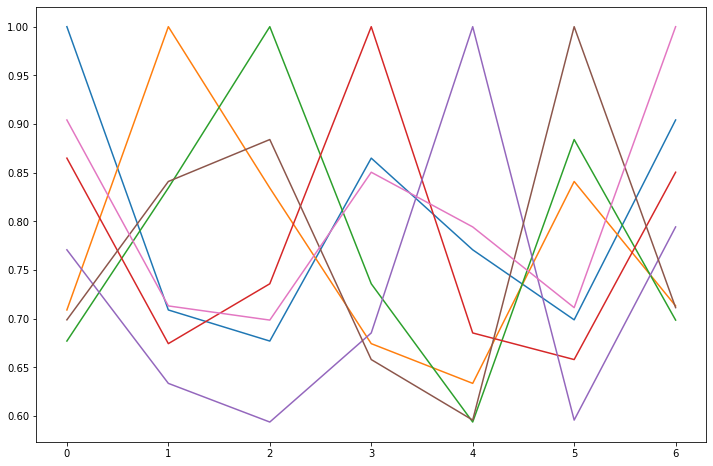

In [18]:
# Plot the cosine similiriaty
fig, ax = plt.subplots(figsize=(12,8))
plt.plot(data)
plt.show()

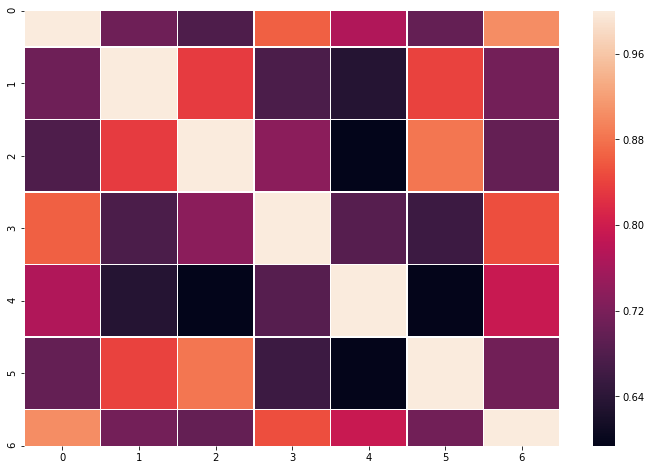

In [19]:
import seaborn as sns
# Plot count of text data grouped by year 
fig, ax = plt.subplots(figsize=(12,8))
ax = sns.heatmap(data, linewidth = 0.5)
plt.show()